In [1]:
import numpy as np
import multiprocessing
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.patches as patches
import cartopy.feature as cfeature

ERROR 1: PROJ: proj_create_from_database: Open of /home/k16v981/.conda/envs/my_env/share/proj failed


# ENSO Modoki Index 
### and its relationship with Southern African Precipitation

#### ENSO Modoki Index is a relationship between the ENSO region and the temperatures of the ocean that surround it. 

In [2]:
mon_sst_anom = xr.open_dataset('/home/k16v981/my_work/data/era5/era5_sst_month_anom.nc')

mon_sst_anom =  mon_sst_anom.sortby('valid_time')

mon_sst_anom = mon_sst_anom.rename({'valid_time': 'date'})

new_dates = pd.to_datetime(mon_sst_anom.coords['date']).to_period('M').start_time
mon_sst_anom = mon_sst_anom.assign_coords(date=new_dates)

In [3]:
#Set up the EMI 
#box A: (165°E-140°W, 10°S-10°N)
box_a = mon_sst_anom['sst'].sel(
    longitude=slice(165, 220),  
    latitude=slice(10, -10)         
)
#Box B: (110°W-70°W, 15°S-5°N)
box_b = mon_sst_anom['sst'].sel(
    longitude=slice(250, 290),  
    latitude=slice(5, -15)         
)
#Box C: (125°E-145°E, 10°S-20°N)
box_c = mon_sst_anom['sst'].sel(
    longitude=slice(125, 145),  
    latitude=slice(20, -10)         
)

In [4]:
mean_box_a = box_a.mean(dim=('latitude', 'longitude'))

mean_box_b = box_b.mean(dim=('latitude', 'longitude'))

mean_box_c = box_c.mean(dim=('latitude', 'longitude'))

In [5]:
EMI = mean_box_a - (0.5 * mean_box_b) - (0.5 * mean_box_c)
EMI

<xarray.DataArray 'sst' (date: 972)> Size: 4kB
array([ 1.97289035e-01,  5.89122951e-01,  4.05836105e-01,  5.29529572e-01,
        4.97358084e-01,  6.55331016e-01,  9.05657649e-01,  1.00705409e+00,
        5.42671084e-01,  4.45503175e-01,  2.70626545e-01,  8.86928916e-01,
        5.91032147e-01,  6.72371805e-01,  4.55929965e-01,  4.56001937e-01,
        2.95210719e-01,  4.97038037e-01,  8.72674584e-01,  8.54733109e-01,
        2.22704858e-01,  4.15254027e-01,  5.39404929e-01,  2.27917075e-01,
        1.48293301e-01,  6.92958653e-01,  5.34912527e-01,  8.15003335e-01,
        2.54130572e-01,  6.19002521e-01,  6.40107512e-01, -8.81878883e-02,
       -4.43198502e-01, -4.55000609e-01, -4.70561951e-01, -7.22167671e-01,
       -7.72083104e-01, -5.57043433e-01, -7.37390995e-01, -5.79100788e-01,
       -4.99216855e-01, -3.61769944e-01, -5.24729013e-01, -1.36708051e-01,
       -2.76348501e-01, -5.81839204e-01, -7.12134838e-01, -4.13894564e-01,
       -1.73484951e-01, -4.46949452e-01,  1.60875559e-01, -2.81497419e-01,
        2.92150974e-02, -5.74285910e-02, -2.75493175e-01, -5.79471290e-01,
       -5.50451577e-01, -3.02561730e-01, -1.24862380e-01, -1.56812415e-01,
       -1.60441667e-01, -6.05690598e-01, -7.45670497e-01, -6.86863184e-01,
       -8.60761404e-01, -4.22055870e-01, -5.29668570e-01, -9.40946639e-01,
       -5.50034940e-01, -7.74014771e-01, -8.63091826e-01, -7.69448221e-01,
       -7.62264192e-01, -6.67177379e-01, -3.91274720e-01, -6.23791039e-01,
        2.65411675e-01,  6.58700645e-01,  6.85729921e-01,  1.50878981e-01,
...
        2.66625881e-01,  2.47369707e-01,  2.88146526e-01,  3.05353701e-01,
        4.77895051e-01,  8.18112135e-01,  6.84580028e-01,  3.28578442e-01,
        4.74167019e-02, -4.93241139e-02,  3.59490961e-02,  2.64814913e-01,
        1.50844648e-01,  3.38514179e-01,  4.55859184e-01,  3.14864695e-01,
        1.57071829e-01,  4.13181365e-01,  2.41811633e-01,  1.78810209e-01,
        4.33753133e-02, -1.68067068e-01, -2.51806229e-01, -3.29632163e-01,
       -4.81991351e-01, -4.68175530e-01, -3.52440774e-01, -3.25647831e-01,
       -5.97816706e-01, -6.84624434e-01, -5.66374183e-01, -4.43547130e-01,
       -2.48236507e-01,  2.12981403e-02, -8.10347497e-02, -2.78011739e-01,
       -2.16464400e-02, -9.17845070e-02,  2.12122202e-02, -2.47857273e-02,
       -1.01710021e-01, -2.41915524e-01, -1.01069316e-01,  3.17990482e-02,
       -5.24774939e-02,  1.16708919e-01,  6.58772439e-02,  3.26228619e-01,
        5.05300224e-01,  5.66891730e-01,  4.49056238e-01,  3.86873364e-01,
        3.85471016e-01,  3.83473396e-01,  4.82060492e-01,  2.60501176e-01,
        1.62048548e-01,  2.73334593e-01,  5.55173099e-01,  6.48774326e-01,
        7.80991077e-01,  7.50500560e-01,  5.42830110e-01,  4.44265485e-01,
        4.98435616e-01,  4.58687037e-01,  3.35722297e-01,  5.01613915e-02,
       -2.09402561e-01,  7.87999630e-02,  2.77064741e-02, -2.78347731e-01,
       -2.33735532e-01, -4.91633028e-01, -5.69853783e-01, -7.52821088e-01],
      dtype=float32)
Coordinates:
    number   (date) int64 8kB 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    surface  (date) float64 8kB 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    month    (date) int64 8kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
  * date     (date) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2020-12-01

### Look at the EMI over Time

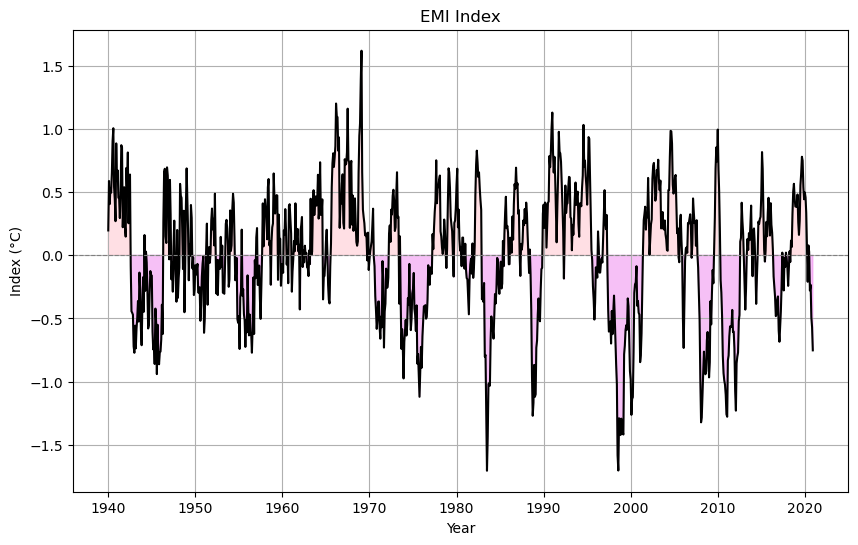

In [6]:
plt.figure(figsize=(10, 6))

# Plot the SST anomalies
plt.plot(EMI['date'], EMI, color='black')

# Fill areas above and below zero
plt.fill_between(EMI['date'], EMI, 0, where=(EMI > 0), color= 'pink', alpha=0.5)
plt.fill_between(EMI['date'], EMI, 0, where=(EMI < 0), color='violet', alpha=0.5)

# Add labels and title
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at y=0
plt.title('EMI Index')
plt.xlabel('Year')
plt.ylabel('Index (°C)')
plt.grid()

# Show the plot
plt.show()

In [7]:
whole_region_EMI = mon_sst_anom['sst'].sel(
    longitude=slice(120, 295),  # Longitude range
    latitude=slice(25, -20)        # Latitude range
)
print(whole_region_EMI)

<xarray.DataArray 'sst' (date: 972, latitude: 181, longitude: 701)> Size: 493MB
[123328332 values with dtype=float32]
Coordinates:
    number     (date) int64 8kB ...
  * latitude   (latitude) float64 1kB 25.0 24.75 24.5 ... -19.5 -19.75 -20.0
  * longitude  (longitude) float64 6kB 120.0 120.2 120.5 ... 294.5 294.8 295.0
    surface    (date) float64 8kB ...
    month      (date) int64 8kB ...
  * date       (date) datetime64[ns] 8kB 1940-01-01 1940-02-01 ... 2020-12-01


### We want to look at the whole region again, so we can visualize what the EMI looks like

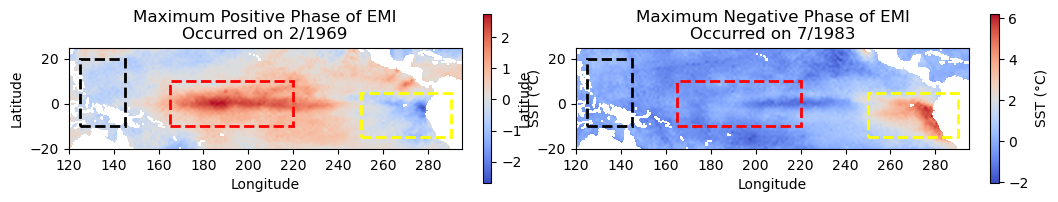

In [8]:
max_positive_idx = EMI.argmax()
max_negative_idx = EMI.argmin()

max_positive_time = EMI.date[max_positive_idx]
max_negative_time = EMI.date[max_negative_idx]

# Extract corresponding SST data
sst_positive = whole_region_EMI.sel(date=max_positive_time, method = 'nearest')
sst_negative = whole_region_EMI.sel(date=max_negative_time, method = 'nearest')

# Step 2: Set up the plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Define the extent based on the region of interest
lon_min, lon_max = 120, 295
lat_min, lat_max = -20, 25

# Step 3: Plot the maximum positive phase
c_positive = axs[0].imshow(sst_positive, origin='upper', cmap='coolwarm', extent=[lon_min, lon_max, lat_min, lat_max])
axs[0].set_title(f'Maximum Positive Phase of EMI\nOccurred on 2/1969')
axs[0].set_xlabel('Longitude')
axs[0].set_ylabel('Latitude')

axs[0].add_patch(plt.Rectangle((165, -10), 55, 20, linewidth=2, edgecolor='red', facecolor='none', linestyle = '--', label='Box A'))
axs[0].add_patch(plt.Rectangle((250, -15), 40, 20, linewidth=2, edgecolor='yellow', facecolor='none', linestyle = '--', label='Box B'))           
axs[0].add_patch(plt.Rectangle((125, -10), 20, 30, linewidth=2, edgecolor='black', facecolor='none', linestyle = '--', label='Box C'))  

# Step 4: Plot the maximum negative phase
c_negative = axs[1].imshow(sst_negative, origin='upper', cmap='coolwarm', extent=[lon_min, lon_max, lat_min, lat_max])
axs[1].set_title(f'Maximum Negative Phase of EMI\nOccurred on 7/1983')
axs[1].set_xlabel('Longitude')
axs[1].set_ylabel('Latitude')

axs[1].add_patch(plt.Rectangle((165, -10), 55, 20, linewidth=2, edgecolor='red', facecolor='none', linestyle = '--', label='Box A'))
axs[1].add_patch(plt.Rectangle((250, -15), 40, 20, linewidth=2, edgecolor='yellow', facecolor='none', linestyle = '--', label='Box B'))           
axs[1].add_patch(plt.Rectangle((125, -10), 20, 30, linewidth=2, edgecolor='black', facecolor='none', linestyle = '--', label='Box C'))

# Add colorbars
cbar_positive = fig.colorbar(c_positive, ax=axs[0], orientation='vertical', fraction=0.02)
cbar_positive.set_label('SST (°C)')

cbar_negative = fig.colorbar(c_negative, ax=axs[1], orientation='vertical', fraction=0.02)
cbar_negative.set_label('SST (°C)')

plt.tight_layout()
plt.savefig('/home/k16v981/my_work/figures/southern_africa/emi_extremes.jpg', format='jpg')

In [9]:
o_f_EMI = EMI.sel(date=(EMI['date.month'] >= 10) | (EMI['date.month'] <= 2))

In [10]:
mon_precip_sa = xr.open_dataset('/home/k16v981/my_work/data/era5/era5_mon_precip_sa.nc')

mon_precip_sa['date'] = pd.to_datetime(mon_precip_sa['date'].values.astype(str), format='%Y%m%d')

o_f_precip_sa = mon_precip_sa.sel(date=(mon_precip_sa['date.month'] >= 10) | (mon_precip_sa['date.month'] <= 2))


### Once again we want to look at the correlation over time

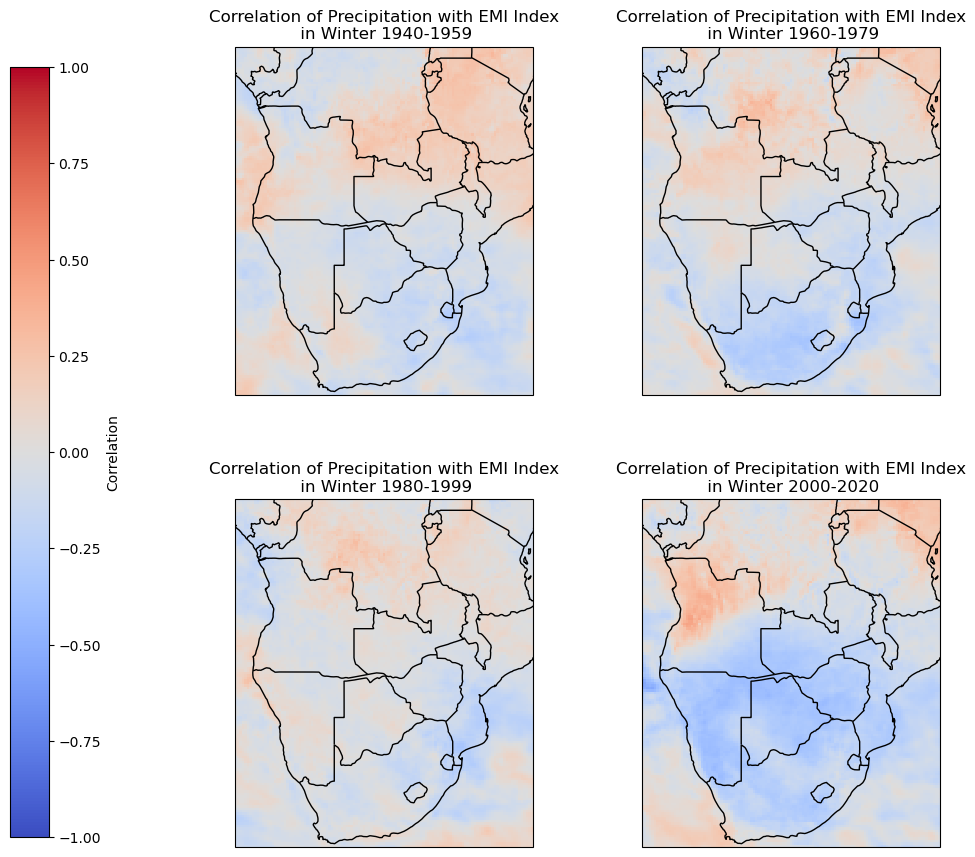

In [11]:
decades = [(1940, 1959), (1960, 1979), (1980, 1999), (2000, 2020)]
titles = ['1940-1959', '1960-1979', '1980-1999', '2000-2020']

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes = axes.flatten()  # Flatten to easily iterate over axes

# Loop over each decade
for i, (start_year, end_year) in enumerate(decades):
    # Subset data for the specific decade
    mask = (o_f_EMI['date'].dt.year >= start_year) & (o_f_EMI['date'].dt.year <= end_year)

    # Subset data for the specific decade
    precip_sa_decade = o_f_precip_sa.sel(date=mask)
    emi_decade = o_f_EMI.sel(date=mask)
    
    # Calculate correlation
    correlation_decade = xr.corr(emi_decade, precip_sa_decade['tp'], dim = 'date')
    
    # Plot correlation
    im = correlation_decade.plot(ax=axes[i], cmap='coolwarm', vmin=-1, vmax=1, add_colorbar=False)
    axes[i].coastlines()
    axes[i].add_feature(cfeature.BORDERS)
    axes[i].set_title(f'Correlation of Precipitation with EMI Index\n in Winter {titles[i]}')

# Adjust layout
cbar = fig.colorbar(im, ax=axes, orientation='vertical', pad=.2, fraction=1)
cbar.set_label('Correlation')

plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.1, wspace=0.3, hspace=0.3)
plt.savefig('/home/k16v981/my_work/figures/southern_africa/corr_emi_oct_feb.jpg', format='jpg')
plt.show()